# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

26422272it [00:04, 5603386.63it/s]                               


Extracting /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw



29696it [00:00, 261006.34it/s]                         


Extracting /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw



4422656it [00:03, 1249338.54it/s]                             


Extracting /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw



6144it [00:00, 9253071.37it/s]          

Extracting /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/ujones/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

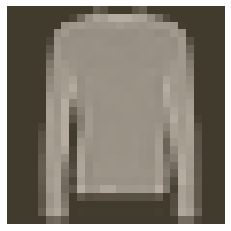

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [23]:
# TODO: Define your network architecture here
from torch import nn, optim, tensor
from collections import OrderedDict

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(OrderedDict(
                            [
                                ('fc1', nn.Linear(784, 128)),
                                ('h1_relu', nn.ReLU()),
                                ('fc2', nn.Linear(128, 64)),
                                ('h2_relu', nn.ReLU()),
                                ('fc3_scores',nn.Linear(64, 10)),
                                ('output_log_softmax',nn.LogSoftmax(dim=1))
                            ]
                        )
                    )
        

    def train(self, 
            trainloader, 
            epochs:int=5, 
            learning_rate:float=0.003, 
            criterion_func = nn.NLLLoss,
            optimizer_func = optim.SGD
        )->None:
        criterion = criterion_func()
        optimizer = optimizer_func(self.model.parameters(), learning_rate)

        for e in range(epochs):
            running_loss = 0
            for images, labels in trainloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
            
                # TODO: Training pass
                
                # Clear the gradients, do this for every training pass because gradients are accumulated
                optimizer.zero_grad()   

                # Forward Pass
                log_ps = self.model(images) # log softmax probabilities
                loss = criterion(log_ps, labels)

                # Backwards Pass
                loss.backward()

                # Update weights
                optimizer.step()

                # Update running loss
                running_loss += loss.item()
            else:
                print(f"Training loss: {running_loss/len(trainloader)}")

    def predict(self,image:tensor, return_probabilities:bool = False):
        # Flatten image
        image.view(image.shape[0],-1)

        # Do forward pass
        log_ps = self.model(image) # log softmax probabilities

        # Output of the network are log-probabilities, need to take exponential for probabilities
        if return_probabilities:
            ps = torch.exp(log_ps)
            return(ps)

        return(log_ps)
                

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [28]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()

In [29]:
# TODO: Train the network here
model.train(trainloader, epochs = 20)

Training loss: 1.575059165896129
Training loss: 0.8176791382623888
Training loss: 0.6643294285037624
Training loss: 0.6015132886768658
Training loss: 0.560723207017252
Training loss: 0.5309261279637372
Training loss: 0.5087923106195321
Training loss: 0.4912877817874524
Training loss: 0.47736785819789745
Training loss: 0.4653134018436932
Training loss: 0.4554903973648543
Training loss: 0.44708313038354236
Training loss: 0.43911939252541266
Training loss: 0.43253621436766726
Training loss: 0.4259064429477334
Training loss: 0.4202441824461097
Training loss: 0.41490148199297217
Training loss: 0.40942075877174383
Training loss: 0.40500044217432485
Training loss: 0.3999957726644809


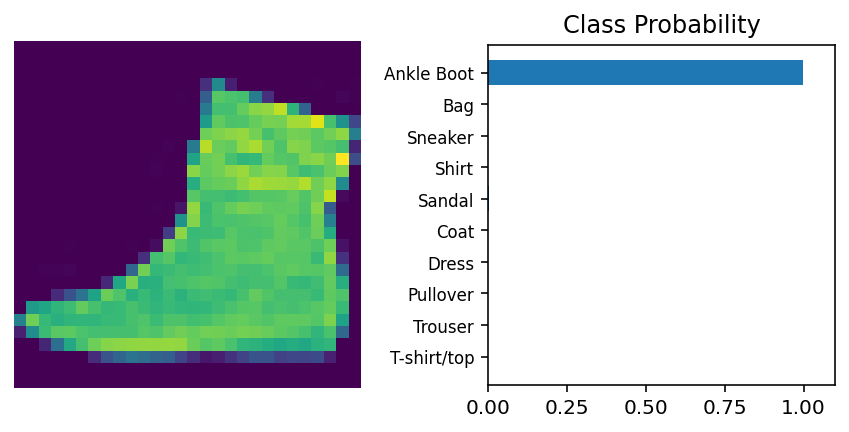

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.predict(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')